In [39]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Read file for unemployment rate (FRED- St. Louis)
file = "../Resources/UNRATE.csv"
unemployment_rate_df = pd.read_csv(file, encoding = "ISO-8859-1")
unemployment_rate_df

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
864,2020-01-01,3.6
865,2020-02-01,3.5
866,2020-03-01,4.4
867,2020-04-01,14.7


In [2]:
# Format the date into Year-Month
unemployment_rate_df['YearMonth'] = pd.to_datetime(unemployment_rate_df['DATE']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

In [3]:
unemployment_rate_df

,DATE,UNRATE,YearMonth
0,1948-01-01,3.4,1948-1
1,1948-02-01,3.8,1948-2
2,1948-03-01,4.0,1948-3
3,1948-04-01,3.9,1948-4
4,1948-05-01,3.5,1948-5
...,...,...,...
864,2020-01-01,3.6,2020-1
865,2020-02-01,3.5,2020-2
866,2020-03-01,4.4,2020-3
867,2020-04-01,14.7,2020-4


In [4]:
# Create a dictionary with just the Unemployment rate columns and YearMonth columns
data_dict = {"YearMonth": unemployment_rate_df["YearMonth"], "Unemployment Rate": unemployment_rate_df["UNRATE"]}
new_unemployment_df = pd.DataFrame(data_dict)
new_unemployment_df

,YearMonth,Unemployment Rate
0,1948-1,3.4
1,1948-2,3.8
2,1948-3,4.0
3,1948-4,3.9
4,1948-5,3.5
...,...,...
864,2020-1,3.6
865,2020-2,3.5
866,2020-3,4.4
867,2020-4,14.7


In [5]:
# Read file for Disney stock price data 
file2 = "Resources/DisneyHistoricalStockPriceData.csv"
stock_df = pd.read_csv(file2, encoding = "ISO-8859-1")
stock_df

,DIS - The Walt Disney Co,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Date,Open,High,Low,Close,Volume
1,6/18/2020,116.88,118.53,115.93,118.37,9562491
2,6/17/2020,118.64,119.23,117.14,117.65,8921557
3,6/16/2020,121.24,121.5,116.05,118.44,12951190
4,6/15/2020,112.08,118.12,111.71,117.08,14156378
...,...,...,...,...,...,...
12529,6/7/1972,1.69,1.69,1.69,1.69,0
12530,6/6/1972,1.68,1.68,1.68,1.68,0
12531,6/5/1972,1.68,1.68,1.68,1.68,0
12532,6/2/1972,1.68,1.68,1.68,1.68,0


In [6]:
# Rename the columns
stock_df.columns = ["date","open","high","low","close","volume"]

In [7]:
stock_df

,date,open,high,low,close,volume
0,Date,Open,High,Low,Close,Volume
1,6/18/2020,116.88,118.53,115.93,118.37,9562491
2,6/17/2020,118.64,119.23,117.14,117.65,8921557
3,6/16/2020,121.24,121.5,116.05,118.44,12951190
4,6/15/2020,112.08,118.12,111.71,117.08,14156378
...,...,...,...,...,...,...
12529,6/7/1972,1.69,1.69,1.69,1.69,0
12530,6/6/1972,1.68,1.68,1.68,1.68,0
12531,6/5/1972,1.68,1.68,1.68,1.68,0
12532,6/2/1972,1.68,1.68,1.68,1.68,0


In [8]:
# Replace the extra column names 
stock_df_2 = stock_df[stock_df["open"] != "Open"]

In [9]:
stock_df_2

,date,open,high,low,close,volume
1,6/18/2020,116.88,118.53,115.93,118.37,9562491
2,6/17/2020,118.64,119.23,117.14,117.65,8921557
3,6/16/2020,121.24,121.5,116.05,118.44,12951190
4,6/15/2020,112.08,118.12,111.71,117.08,14156378
5,6/12/2020,115.17,117,112.89,115.49,18361940
...,...,...,...,...,...,...
12529,6/7/1972,1.69,1.69,1.69,1.69,0
12530,6/6/1972,1.68,1.68,1.68,1.68,0
12531,6/5/1972,1.68,1.68,1.68,1.68,0
12532,6/2/1972,1.68,1.68,1.68,1.68,0


In [10]:
# Make a data frame with just the date and close prices
stock_clean_df = stock_df_2[["date","close"]]

In [11]:
stock_clean_df

,date,close
1,6/18/2020,118.37
2,6/17/2020,117.65
3,6/16/2020,118.44
4,6/15/2020,117.08
5,6/12/2020,115.49
...,...,...
12529,6/7/1972,1.69
12530,6/6/1972,1.68
12531,6/5/1972,1.68
12532,6/2/1972,1.68


In [12]:
# Convert the close price column to floats
stock_clean_df['close'] = stock_clean_df['close'].astype(float)

/Users/himanimanglik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# Format the date into Year-Month
stock_clean_df['YearMonth'] = pd.to_datetime(stock_clean_df['date']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

/Users/himanimanglik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# Group the data by YearMonth and average the close prices
stock_grouped_df = stock_clean_df.groupby('YearMonth').mean()

In [15]:
# Sort values 
stock_grouped_df.sort_values(by='YearMonth', ascending=True)

,close
YearMonth,
1972-10,1.630000
1972-11,1.746364
1972-12,2.005238
1972-6,1.683636
1972-7,1.722857
...,...
2020-2,136.830000
2020-3,101.887727
2020-4,102.584545


In [16]:
stock_grouped_df

,close
YearMonth,
1972-10,1.630000
1972-11,1.746364
1972-12,2.005238
1972-6,1.683636
1972-7,1.722857
...,...
2020-2,136.830000
2020-3,101.887727
2020-4,102.584545


In [17]:
# Join the unemployment data with the stock price data on the YearMonth 
combined_data = new_unemployment_df.join(stock_grouped_df, on='YearMonth')

In [18]:
combined_data

,YearMonth,Unemployment Rate,close
0,1948-1,3.4,NaN
1,1948-2,3.8,NaN
2,1948-3,4.0,NaN
3,1948-4,3.9,NaN
4,1948-5,3.5,NaN
...,...,...,...
864,2020-1,3.6,143.000435
865,2020-2,3.5,136.830000
866,2020-3,4.4,101.887727
867,2020-4,14.7,102.584545


In [19]:
# Drop the NA value columns
combined_data.dropna(inplace = True)
# Reset the index
combined_data.reset_index(drop=True)

,YearMonth,Unemployment Rate,close
0,1972-6,5.7,1.683636
1,1972-7,5.6,1.722857
2,1972-8,5.6,1.766087
3,1972-9,5.5,1.636190
4,1972-10,5.6,1.630000
...,...,...,...
571,2020-1,3.6,143.000435
572,2020-2,3.5,136.830000
573,2020-3,4.4,101.887727
574,2020-4,14.7,102.584545


In [20]:
# Get a few of the date labels 
date_labels = []
for date_index in combined_data.index:
    if date_index%50 == 0:
        date_labels.append(combined_data["YearMonth"][date_index])
date_labels

['1973-1',
 '1977-3',
 '1981-5',
 '1985-7',
 '1989-9',
 '1993-11',
 '1998-1',
 '2002-3',
 '2006-5',
 '2010-7',
 '2014-9',
 '2018-11']

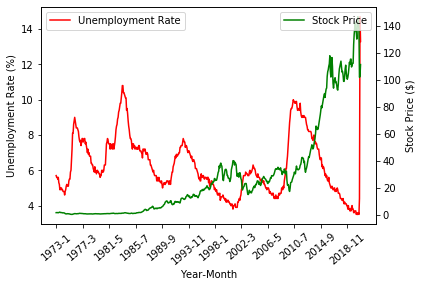

In [22]:
# Plot the Year-Month on the x-axis, and unemployment rate and stock price in two y-axis 
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ln_1 = ax.plot(np.arange(len(combined_data)),combined_data["Unemployment Rate"], color = "red", label = "Unemployment Rate")
ln_2 = ax2.plot(np.arange(len(combined_data)),combined_data["close"], color = "green" , label = "Stock Price")
ax.set_xlabel("Year-Month")
ax.set_ylabel("Unemployment Rate (%)")
ax2.set_ylabel("Stock Price ($)")
ax.set_xticks(np.arange(0,len(combined_data), 50))
ax.set_xticklabels(date_labels, rotation = 40)
ax.legend()
ax2.legend(loc="upper right")
plt.show
plt.savefig("Figures/Unemployment Rate and Stock Price.png")

In [ ]:
# Compute the Pearson correlation coefficient between "Unemployment Rate" and "Disney stock price"
correlation = st.pearsonr(combined_data["Unemployment Rate"],combined_data["close"])
print(f"The correlation between unemployment rate and Disney stock price is {round(correlation[0],2)}")

In [ ]:
# Add the linear regression equation and line to plot
x_values = combined_data['Unemployment Rate']
y_values = combined_data['close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,75),fontsize=15,color="red")
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Stock Price ($)')
plt.title("Unemployment Rate and Stock Price Linear Regression")
plt.show()

In [ ]:
# Read file for initial unemployment claims 
file3 = "Resources/ICSA.csv"
initial_claims_df= pd.read_csv(file3, encoding = "ISO-8859-1")

In [ ]:
initial_claims_df

In [ ]:
# Format the date into Year-Month
initial_claims_df["YearMonth"] = pd.to_datetime(initial_claims_df["DATE"]).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

In [ ]:
# Group the data by YearMonth and sum the inital claims
claims_grouped_df = initial_claims_df.groupby("YearMonth").sum()

In [ ]:
claims_grouped_df

In [ ]:
# Join the initial claims data with the stock price data on the YearMonth 
combined_data_2 = claims_grouped_df.join(stock_grouped_df, on='YearMonth')

In [ ]:
combined_data_2

In [ ]:
# Drop the NA value columns
combined_data_2.dropna(inplace = True)
# Reset the index
combined_data_2 = combined_data_2.reset_index(drop=False)

In [ ]:
combined_data_2

In [ ]:
# Get a few of the date labels
date_labels = []
for date_index in combined_data_2.index:
    if date_index%50 == 0:
        date_labels.append(combined_data_2["YearMonth"][date_index])
date_labels

In [ ]:
# Plot the Year-Month on the x-axis, and inital claims and stock price in two y-axis 
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ln_1 = ax.plot(np.arange(len(combined_data_2)),combined_data_2["ICSA"], color = "red", label = "Initial Claims")
ln_2 = ax2.plot(np.arange(len(combined_data_2)),combined_data_2["close"], color = "green" , label = "Stock Price")
ax.set_xlabel("Year-Month")
ax.set_ylabel("Initial Claims")
ax2.set_ylabel("Stock Price ($)")
ax.set_xticks(np.arange(0,len(combined_data_2), 50))
ax.set_xticklabels(date_labels, rotation = 40)
ax.legend()
ax2.legend(loc="upper right")
plt.show

In [ ]:
# Compute the Pearson correlation coefficient between "Initial Claims" and "Disney stock price"
correlation = st.pearsonr(combined_data_2["ICSA"],combined_data_2["close"])
print(f"The correlation between initial claims and Disney stock price is {round(correlation[0],2)}")

In [ ]:
# Add the linear regression equation and line to plot
x_values = combined_data_2['ICSA']
y_values = combined_data_2['close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.25,100),fontsize=15,color="red")
plt.xlabel('Initial Claims')
plt.ylabel('Stock Price ($)')
plt.title("Initial Claims and Stock Price Linear Regression")
plt.show()